# NLP Techniques


Apply key NLP tehniques to analyze a real-world text dataset: a WhatsApp group chat. Process the text, identify the most frequent words, and create meaningful visualization of the findings.

### Upload GoogleDrive files & Setup



In [ ]:
# Connect Google drive to import the file
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read file on google drive
!ls "/content/drive/My Drive/DG: Colab Notebooks/Coding_files/"

f = open('/content/drive/My Drive/DG: Colab Notebooks/Coding_files/Hamburg_amigos_chat.txt', 'r')


Hamburg_amigos_chat.txt  Hybrid_Intelligence.txt


In [ ]:
# Read content
text = f.read()
f.close()

print(text)

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.0 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Remove Punctuation, quotes, contraction & stopwords

In [ ]:
# Erase punctuations an quotes
import re

def clean_text(text):
  #Remove punctuations and quotes using regular expressions
  cleaned_text = re.sub(r'[^\w\s]|[\<\>\/\-]|[0-9]|[:]|(WhatsApp)|(Multimedia omitido)|p\.?\s?m\.?|a\.?\s?m\.?|(Elisa Pesenti)|(Emiliano Mercado)|(Erika Bell)', '', text) # | act as an "or"
  return cleaned_text

cleaned_text = clean_text(text)

#txt = text.split()
print(cleaned_text)

In [ ]:
# Erase contractions
import contractions

# Expand contractions
cleaned_text = contractions.fix(cleaned_text)

print(cleaned_text)

In [ ]:
# Alternative: Use tokenize instead of split()
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab') # Data package

tokenize_text = word_tokenize(cleaned_text)
print(tokenize_text)

['Los', 'mensajes', 'y', 'las', 'lladas', 'están', 'cifrados', 'de', 'extremo', 'a', 'extremo', 'Nadie', 'fuera', 'de', 'este', 'chat', 'ni', 'siquiera', 'puede', 'leerlos', 'ni', 'escucharlos', 'Toca', 'para', 'obtener', 'más', 'información', 'Creaste', 'este', 'grupo', 'Actualizaste', 'la', 'duración', 'de', 'los', 'mensajes', 'Los', 'mensajes', 'nuevos', 'desaparecerán', 'de', 'este', 'chat', 'después', 'de', 'días', 'de', 'haber', 'sido', 'enviados', 'enos', 'que', 'se', 'use', 'la', 'opción', 'para', 'conservarlos', 'Añadiste', 'a', 'Hiii', 'How', 'are', 'you', 'guys', 'Someone', 'has', 'Suels', 'phone', 'number', 'Or', 'can', 'ask', 'him', 'something', 'in', 'class', 'by', 'any', 'chance', 'Who', 'is', 'Suel', 'Suel', 'Osei', 'I', 'think', 'is', 'the', 'guy', 'you', 'speak', 'Italian', 'with', 'No', 'I', 'do', 'not', 'have', 'his', 'number', 'sorry', 'Are', 'you', 'all', 'coming', 'Istg', 'if', 'she', 'cancels', 'again', 'I', 'on', 'my', 'way', 'Hi', 'I', 'just', 'arrived', 'To',

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Erase the stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# get stop words
stop_words = set(stopwords.words('english'))
spanish_stop_words = set(stopwords.words('spanish'))

# Identify tokens that are no stop words
tokens_without_sw = [w.lower() for w in tokenize_text if not w.lower() in stop_words]
tokens_without_sw = [w.lower() for w in tokens_without_sw if not w.lower() in spanish_stop_words]
tokens_without_sw


### Lemmatization

Normalize tokens by reducing them to their root forms.

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in tokens_without_sw]
lemmatized

### Analysis


In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Count the number of occurences
counts = Counter(lemmatized)
print(counts)

Counter({'market': 25, 'si': 21, 'asset': 18, 'guy': 15, 'token': 14, 'liability': 14, 'digital': 13, 'sinner': 11, 'term': 11, 'fund': 11, 'payment': 10, 'credit': 10, 'class': 9, 'business': 9, 'limited': 9, 'today': 9, 'company': 9, 'ah': 8, 'tomorrow': 8, 'jannick': 8, 'client': 8, 'december': 8, 'description': 8, 'exple': 8, 'money': 8, 'crypto': 8, 'going': 7, 'modification': 7, 'bgb': 7, 'th': 7, 'offer': 7, 'text': 7, 'jueves': 7, 'vos': 7, 'personal': 7, 'mutual': 7, 'loan': 7, 'think': 6, 'law': 6, 'owner': 6, 'delivery': 6, 'partner': 6, 'investment': 6, 'traded': 6, 'consumer': 6, 'bitcoin': 6, 'yes': 5, 'min': 5, 'time': 5, 'mensaje': 5, 'contract': 5, 'position': 5, 'original': 5, 'may': 5, 'online': 5, 'like': 5, 'paper': 5, 'siempre': 5, 'comer': 5, 'temprano': 5, 'textreplace': 5, 'partnership': 5, 'capital': 5, 'alternative': 5, 'deposit': 5, 'security': 5, 'ethereum': 5, 'blockchain': 5, 'ok': 4, 'good': 4, 'structure': 4, 'cuz': 4, 'editó': 4, 'blend': 4, 'oat': 4, 

In [ ]:
# Count the top 10 most common words
top_10 = counts.most_common(10)
print(top_10)

[('market', 25), ('si', 21), ('asset', 18), ('guy', 15), ('token', 14), ('liability', 14), ('digital', 13), ('sinner', 11), ('term', 11), ('fund', 11)]


In [ ]:
# For visualization. Unzip labels and counts in variables
labels, counts = zip(*top_10)

counts

(25, 21, 18, 15, 14, 14, 13, 11, 11, 11)

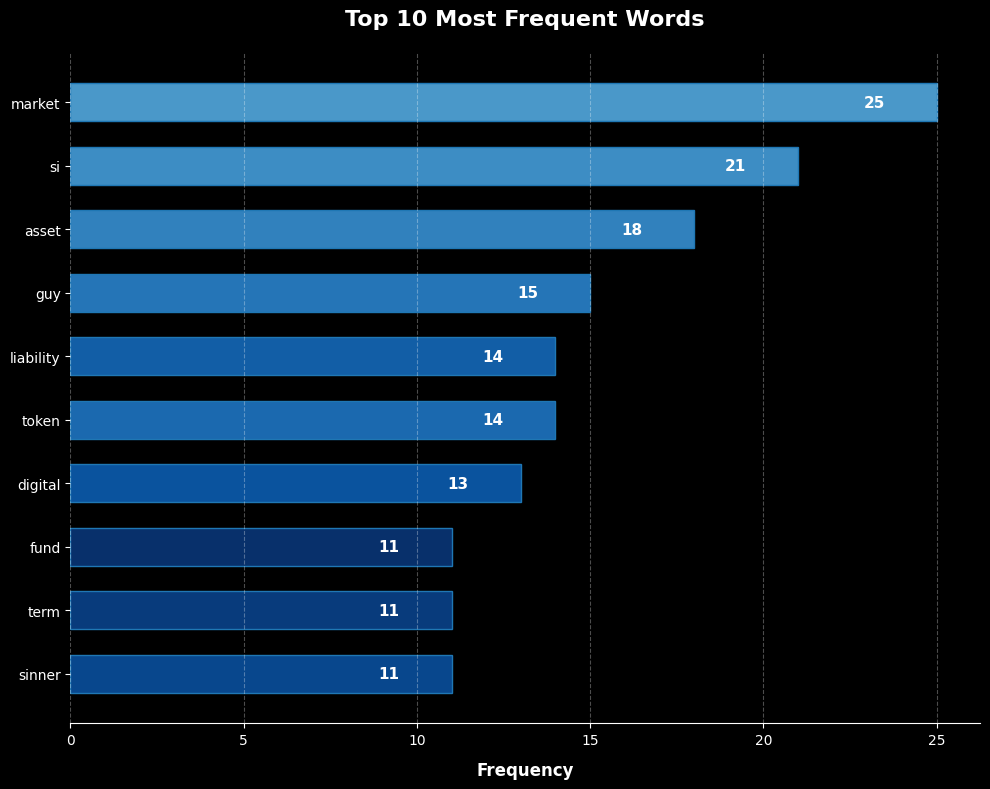

In [ ]:
# Barplot on labels and counts
# Sort data for better visualization
sorted_indices = np.argsort(counts)
sorted_labels = np.array(labels)[sorted_indices]
sorted_counts = np.array(counts)[sorted_indices]

# Create color gradient
blues = plt.cm.Blues(np.linspace(0.6, 1, len(labels)))
sorted_blues = blues[sorted_indices]

plt.figure(figsize=(10, 8))
plt.style.use('dark_background')

# Horizontal bar chart
bars = plt.barh(sorted_labels, sorted_counts, color=sorted_blues,
                edgecolor='#1f77b4', linewidth=1, height=0.6)

# Add data labels inside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width - 1.5, bar.get_y() + bar.get_height()/2,
             str(int(sorted_counts[i])), ha='right', va='center',
             color='white', fontweight='bold', fontsize=11)

# Styling
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlabel("Frequency", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Top 10 Most Frequent Words", fontsize=16, fontweight='bold', pad=20)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('horizontal_word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()
